In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [3]:
from preprocessing import CsvRefactorer

In [337]:
ids_map = {
    299: "T1aHE",
    309: "P2",
    315: "T1bHE",
    317: "T2bHE",
    319: "T2aHE",
    321: "Treactor",
    325: "T2aHE1",
    327: "Tair",
    381: "CTF1",
    395: "CTF2",
    396: "CTF3",
    460: "T2aHE2",
    461: "T2aHE3",
    462: "T2aHE4",
    463: "T2aHE5",
    481: "Q2",
    406: "p21",
    407: "p22",
    408: "p23",
    409: "p24",
}

In [4]:
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_060921_to_010722.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_060921_to_010722.csv")

In [348]:
ids_array1 = df_refacP1.select_by_ids(df_refacP1.ids)
ids_array2 = df_refacP2.select_by_ids(df_refacP2.ids)

In [349]:
group1 = df_refacP1.min_frac_groupby(10, *ids_array1)
group2 = df_refacP2.min_frac_groupby(10, *ids_array2)

In [361]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

In [362]:
df = pd.concat([df1, df2], axis=1).loc["2021-09-08":"2021-09-08", :].rename(columns=ids_map)

In [363]:
# quick TCF categorizing ( set 0 or 1)

df["CTF1"] = np.where(df["CTF1"] > 20, 1, 0)
df["CTF2"] = np.where(df["CTF2"] > 20, 1, 0)
df["CTF3"] = np.where(df["CTF3"] > 20, 1, 0)

# quick I of pumps filter
df["p21"] = np.where(df["p21"] < 10, 1, df["p21"])
df["p22"] = np.where(df["p22"] < 10, 1, df["p22"])
df["p23"] = np.where(df["p23"] < 10, 1, df["p23"])
df["p24"] = np.where(df["p24"] < 10, 1, df["p24"])

In [364]:
# quick NaN handling

df = df.fillna(0.0)
zero_pressure = df[df["P2"] == 0.0].index
zero_currents = df[
    (df["p21"] == 0.0) &
    (df["p22"] == 0.0) &
    (df["p23"] == 0.0) &
    (df["p24"] == 0.0)
].index
# drop rows where pressure is nill
df = df.drop(index=zero_pressure)
df = df.drop(index=zero_currents)

In [365]:
pumps2 = df.loc[:, ["p21", "p22", "p23", "p24"]]
df["I2mean"] = pumps2.sum(axis=1)/3

In [366]:
df["QbyIP"] = df["Q2"]/(df["P2"]*df["I2mean"])

In [390]:
df["QbyI"] = df["Q2"]/(df["I2mean"])

In [391]:
df

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,CTF1,CTF2,...,p23,p24,T2aHE2,T2aHE3,T2aHE4,T2aHE5,I2mean,QbyIP,lmtd,QbyI
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-09-08 00:00:00,43.653125,0.370,50.024242,32.487879,37.890626,45.097221,6.146495,15.527027,1,0,...,148.524369,140.334813,6.194315,0.861917,4.842242,4.682022,144.619182,19.741970,10.579393,7.304529
2021-09-08 00:10:00,43.599998,0.370,50.000000,32.400002,37.803225,45.105263,6.196771,15.138889,1,0,...,148.441278,140.205852,6.223397,0.903460,4.864213,4.706172,144.482566,19.776069,10.627817,7.317146
2021-09-08 00:20:00,43.593547,0.370,49.974194,32.372728,37.799999,45.140540,6.172726,14.788889,1,0,...,148.865696,140.789417,6.219619,0.874926,4.866031,4.700573,145.003256,19.719035,10.625919,7.296043
2021-09-08 00:30:00,43.500000,0.370,49.903227,32.299999,37.700001,45.081081,6.200001,14.463889,1,0,...,148.875541,140.790073,6.225065,0.891723,4.862411,4.706665,144.980791,19.724421,10.631389,7.298036
2021-09-08 00:40:00,43.471429,0.370,49.884850,32.221213,37.641666,44.989744,6.188164,14.225714,1,0,...,148.537955,140.454496,6.243873,0.915754,4.881589,4.720378,144.670734,19.756419,10.675268,7.309875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08 23:10:00,40.900002,0.368,47.206452,29.799999,35.190323,42.586485,6.100002,16.120000,1,1,...,149.626272,142.865319,6.300123,0.733377,4.809567,4.711133,146.111358,19.687931,10.493408,7.245159
2021-09-08 23:20:00,40.828571,0.366,47.200001,29.799999,35.162500,42.566666,6.096776,15.973529,1,1,...,150.168891,143.352969,6.280459,0.729186,4.788502,4.691233,146.601987,19.742312,10.458288,7.225687
2021-09-08 23:30:00,40.806451,0.368,47.216130,29.799999,35.182353,42.507500,6.087502,15.785714,1,1,...,149.846061,143.045034,6.281095,0.723723,4.795326,4.699170,146.358149,19.677942,10.432323,7.241483


In [368]:
from analytics import WaterFlowRates
wfr = WaterFlowRates(0.05)

In [371]:
df, _ = wfr.df_md_filter(df, "QbyIP")

19.692301668435437


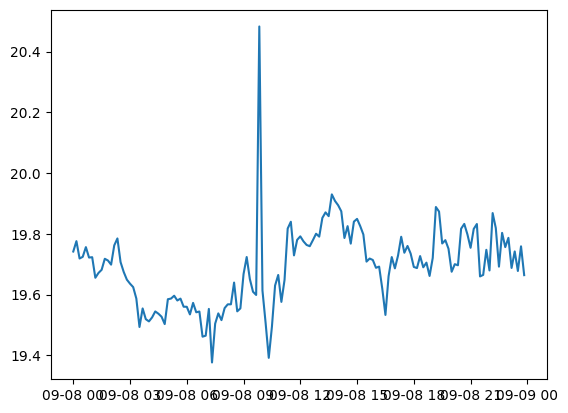

In [395]:
plt.plot(df["QbyIP"])
print(df["QbyIP"].mean())

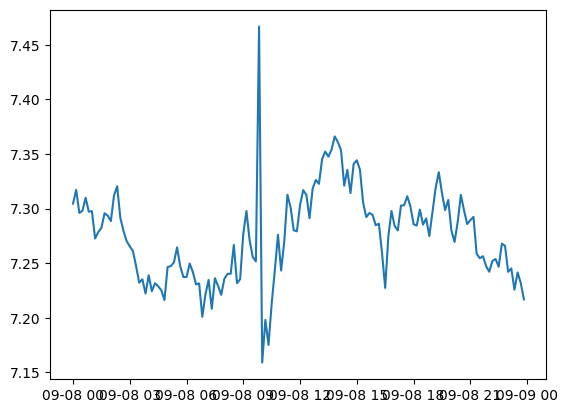

In [394]:
plt.plot(df["QbyI"])

In [374]:
df["lmtd"] = (df["T1aHE"] - df["T2aHE"] - (df["T1bHE"] - df["T2bHE"]))/np.log((df["T1aHE"] - df["T2aHE"])/(df["T1bHE"] - df["T2bHE"]))

In [375]:
df.loc[:,["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]] = df\
    .loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]]\
    .apply(lambda x: x - df["T2bHE"])

In [540]:
T2_mean = (df["T2aHE"] - df["T2bHE"]).mean(axis=0)
T2aHE_arr = df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE4", "T2aHE5"]].mean(axis=0).to_numpy()
T2aHE_arr

array([5.96896338, 6.11673807, 4.71698762, 4.5803484 ])

In [529]:
T2_mean_arr = np.array(T2_mean)

T2_mean_arr = np.full((len(T2aHE_arr),1), T2_mean)

In [530]:
t_coefs = T2_mean/T2aHE_arr
t_coefs

array([0.87819113, 0.85697486, 1.1112793 , 1.14443057])

In [534]:
X_interp = [1,2,4,5]
t3 = np.interp(3, X_interp, t_coefs)
t_coefs = np.array([*t_coefs[:2], t3, *t_coefs[2:]])
t_coefs

array([0.87819113, 0.85697486, 0.98412708, 1.1112793 , 1.14443057])

In [548]:
df["QbyI"].mean()/4/t_coefs*(df["T2aHE"] - df["T2bHE"]).mean(axis=0)
N_norm = (df["QbyI"].mean()/4*t_coefs*(df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]]).mean(axis=0)).sum()
# df["QbyI"].mean()/4/t_coefs[::-1]*(df["T2aHE"] - df["T2bHE"]).mean(axis=0)
df["QbyI"].mean()/4*t_coefs*(df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]]).mean(axis=0)

T2aHE1    9.534656
T2aHE2    9.534656
T2aHE3    1.414128
T2aHE4    9.534656
T2aHE5    9.534656
dtype: float64

In [549]:
N_mean = df["QbyI"].mean(axis=0)*T2_mean

In [550]:
N_norm, N_mean

(39.55275237208134, 38.1386245770327)

In [479]:
T2aHE_means = df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]].mean(axis=0)
T2_mean

5.241890720468172

In [378]:
T2aHE_means, T2aHE_means.mean(), df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE4", "T2aHE5"]].mean(axis=0).mean()

(T2aHE1    5.968963
 T2aHE2    6.116738
 T2aHE3    0.789988
 T2aHE4    4.716988
 T2aHE5    4.580348
 dtype: float64,
 4.43460506013753,
 5.345759366364538)

<BarContainer object of 5 artists>

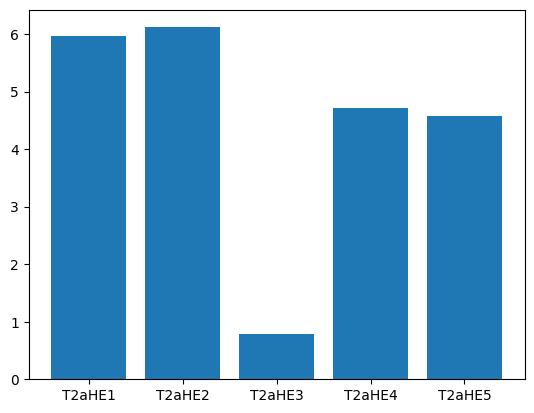

In [312]:
# the 3d is broken so dt cannot be used to get ki
plt.bar(T2aHE_means.index, T2aHE_means)

In [313]:
# lets get dt on 3d HE by interpolation between HE2 and HE4

<BarContainer object of 5 artists>

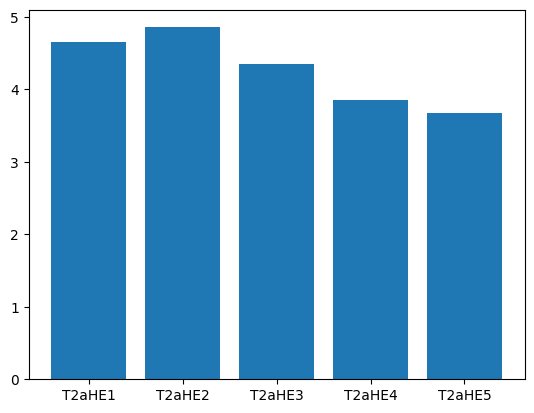

In [315]:
y_interp = [4.65, 4.855, y3, 3.852, 3.675]
plt.bar(T2aHE_means.index, y_interp)

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,CTF1,CTF2,...,p22,p23,p24,T2aHE2,T2aHE3,T2aHE4,T2aHE5,I2mean,QbyIP,lmtd
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-09-08 00:00:00,43.653125,0.370,50.024242,32.487879,37.890626,45.097221,6.146495,15.527027,1,0,...,144.998365,148.524369,140.334813,6.194315,0.861917,4.842242,4.682022,144.619182,19.741970,10.579393
2021-09-08 00:10:00,43.599998,0.370,50.000000,32.400002,37.803225,45.105263,6.196771,15.138889,1,0,...,144.800569,148.441278,140.205852,6.223397,0.903460,4.864213,4.706172,144.482566,19.776069,10.627817
2021-09-08 00:20:00,43.593547,0.370,49.974194,32.372728,37.799999,45.140540,6.172726,14.788889,1,0,...,145.354654,148.865696,140.789417,6.219619,0.874926,4.866031,4.700573,145.003256,19.719035,10.625919
2021-09-08 00:30:00,43.500000,0.370,49.903227,32.299999,37.700001,45.081081,6.200001,14.463889,1,0,...,145.276761,148.875541,140.790073,6.225065,0.891723,4.862411,4.706665,144.980791,19.724421,10.631389
2021-09-08 00:40:00,43.471429,0.370,49.884850,32.221213,37.641666,44.989744,6.188164,14.225714,1,0,...,145.019750,148.537955,140.454496,6.243873,0.915754,4.881589,4.720378,144.670734,19.756419,10.675268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08 23:10:00,40.900002,0.368,47.206452,29.799999,35.190323,42.586485,6.100002,16.120000,1,1,...,145.842484,149.626272,142.865319,6.300123,0.733377,4.809567,4.711133,146.111358,19.687931,10.493408
2021-09-08 23:20:00,40.828571,0.366,47.200001,29.799999,35.162500,42.566666,6.096776,15.973529,1,1,...,146.284100,150.168891,143.352969,6.280459,0.729186,4.788502,4.691233,146.601987,19.742312,10.458288
2021-09-08 23:30:00,40.806451,0.368,47.216130,29.799999,35.182353,42.507500,6.087502,15.785714,1,1,...,146.183352,149.846061,143.045034,6.281095,0.723723,4.795326,4.699170,146.358149,19.677942,10.432323


In [384]:
t_coefs = T2aHE_means/(df["T2aHE"] - df["T2bHE"]).mean()

In [389]:
df["QbyIP"].mean()*t_coefs, (df["QbyIP"].mean()*t_coefs.drop("T2aHE3")).mean(), df["QbyIP"].mean()

(T2aHE1    22.423708
 T2aHE2    22.978856
 T2aHE3     2.967761
 T2aHE4    17.720389
 T2aHE5    17.207074
 dtype: float64,
 20.08250680966365,
 19.692301668435437)